## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 


## Load and Review Data

In [2]:
pdata = pd.read_csv("bank-full.csv")

In [3]:
pdata.shape

(45211, 17)

In [4]:
pdata.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [5]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## EDA: Study the data distribution in each attribute and target variable

In [6]:
pdata.isnull().values.any()

False

In [7]:
pdata.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## Number of unique in each column

In [8]:
pdata.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [9]:

pdata.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
cData = pd.get_dummies(pdata, columns=['Target','marital','education','housing','loan','contact','poutcome','default','job','month'])
cData.head()

,age,balance,day,duration,campaign,pdays,previous,Target_no,Target_yes,marital_divorced,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


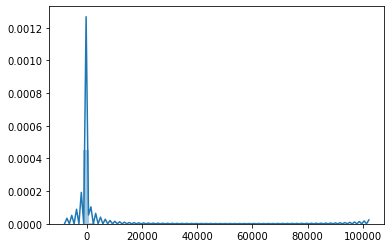

In [11]:
sns.distplot(cData) # plots a frequency polygon superimposed on a histogram using the seaborn package.


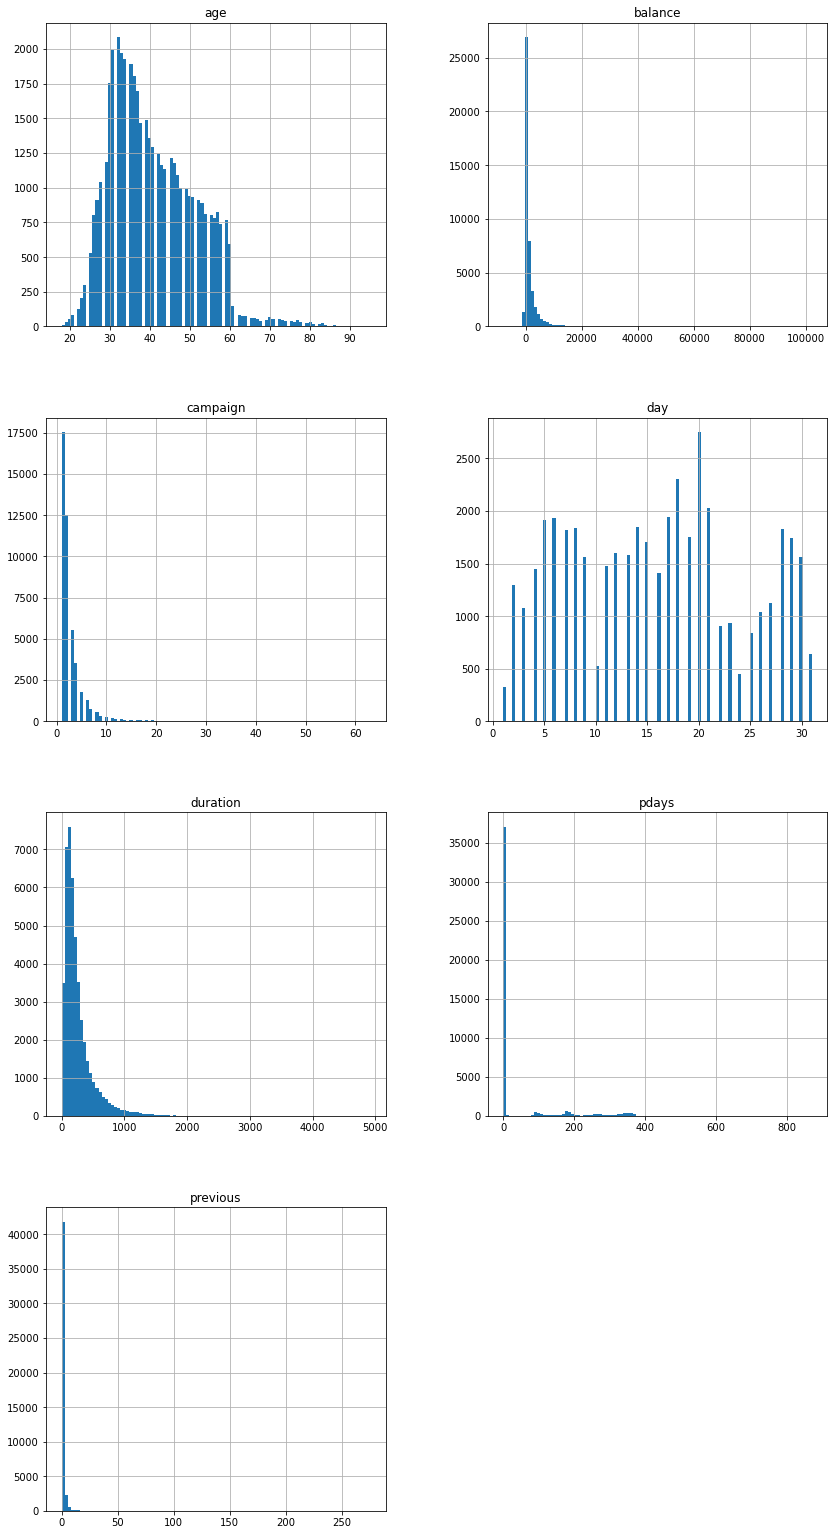

In [12]:
pdata.hist(stacked=False, bins=100, figsize=(14,100), layout=(14,2)); # performing univariate analysis on numerical variables

## We can get lot of information from above plots
## Age: Although its not a proper bell curve we can see that there is a pattern and we may exclude outliers here if needed for analysis
## Balance: As expected there is skewness in the data for balance. Negative balance can be considered that they might have withdrawn more than what they have. Certain customers have very balance so we can consider them as outliers if needed
## Campaign: Looks like left skewed. Looks like there are very few cutomers who got hit by campaign earlier and most of the customers got hit by campaign less than 5 to 10 times
## Day: looks like its evenly distributed means
## Duration: This also looks like left skewed and most of them fall under less than 6 to 700
## pdays:Looks like 0 is an outlier here . If we remove it most of other values will fall from 50 to 350
## previous: looks like most of the customers are not contacted prviously and a lot of the were contacted less than 10 times

In [14]:
for i in  ['age','balance','campaign','day','duration','pdays','previous']:
    print("######### %s ########" % i)
    print(pdata[i].value_counts())

######### age ########
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
######### balance ########
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
######### campaign ########
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63   

## We changed Objects in categorical variables in order address data problems¶


## Deliverable 1 - Question 2

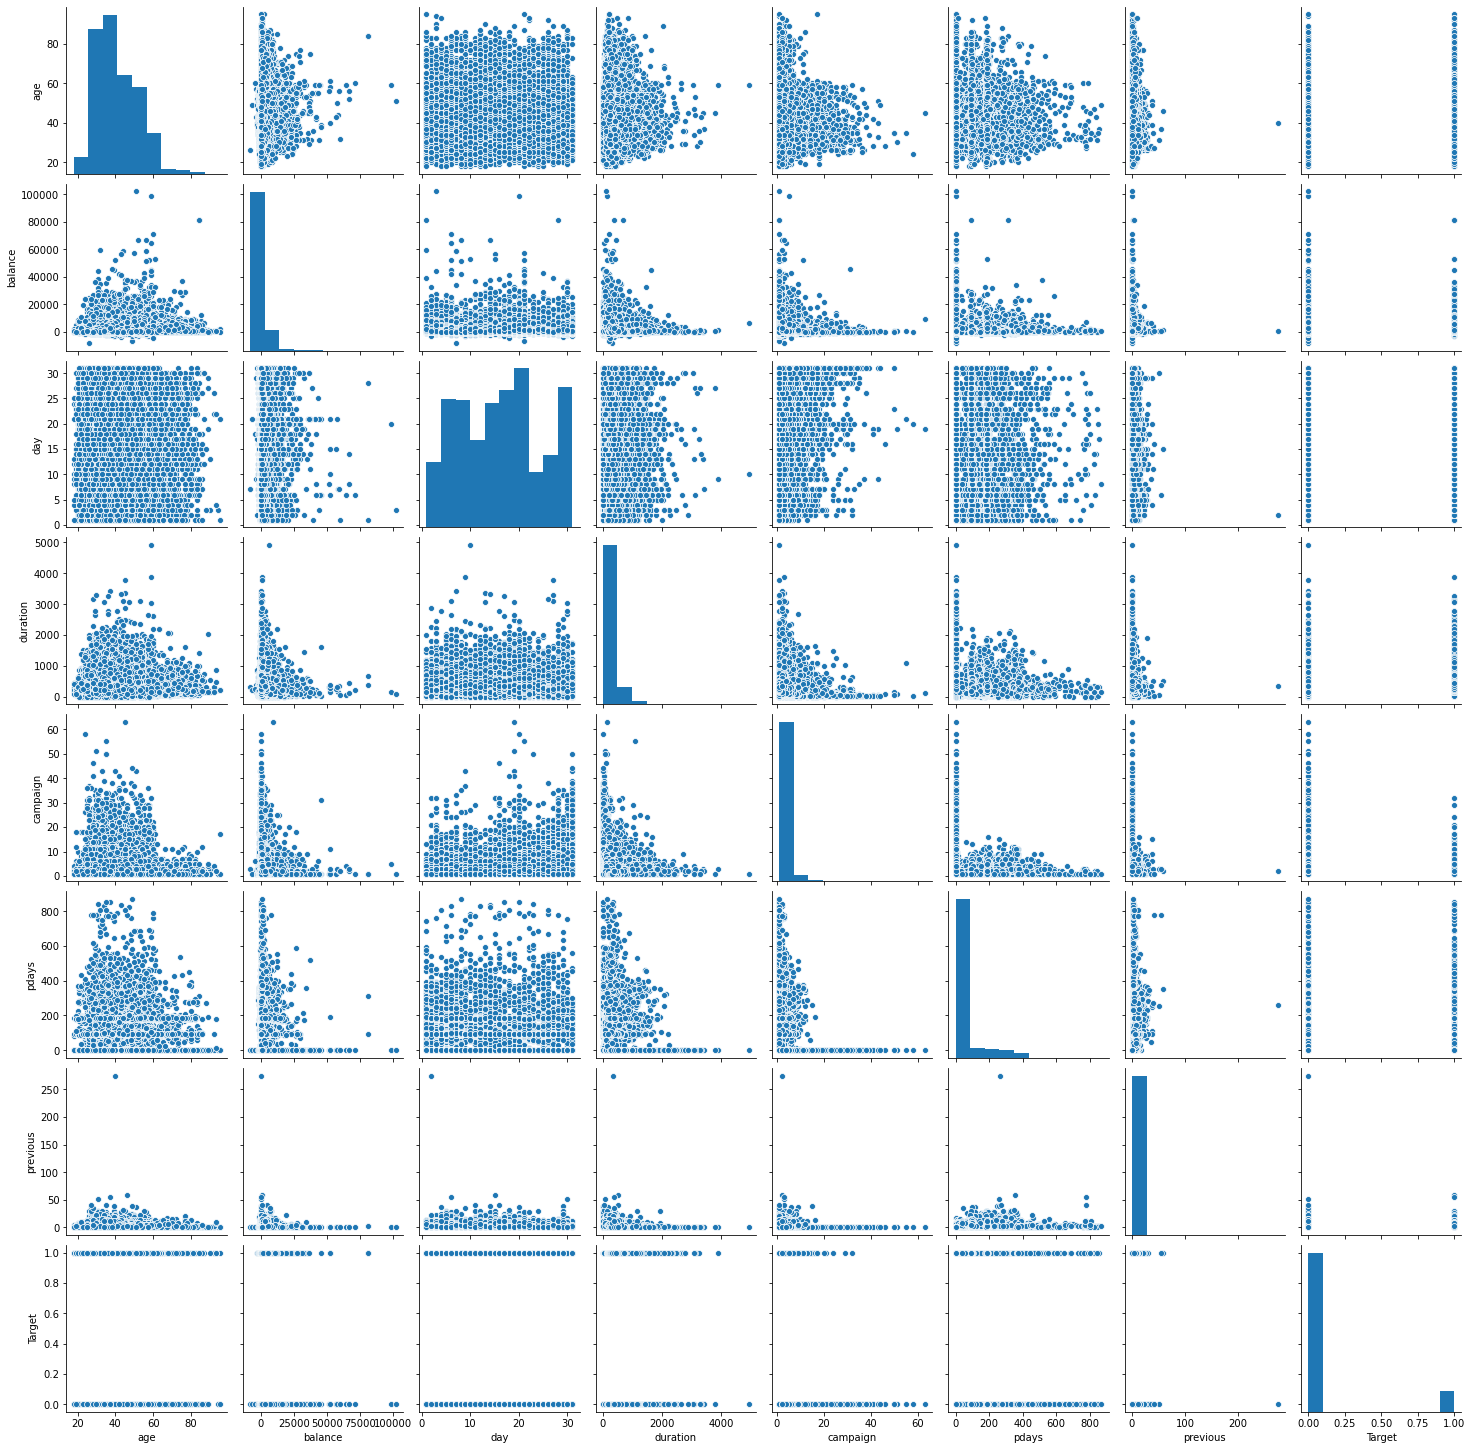

In [15]:
pdata['Target']=pdata['Target'].replace(['no','yes'],[0,1])
sns.pairplot(pdata)


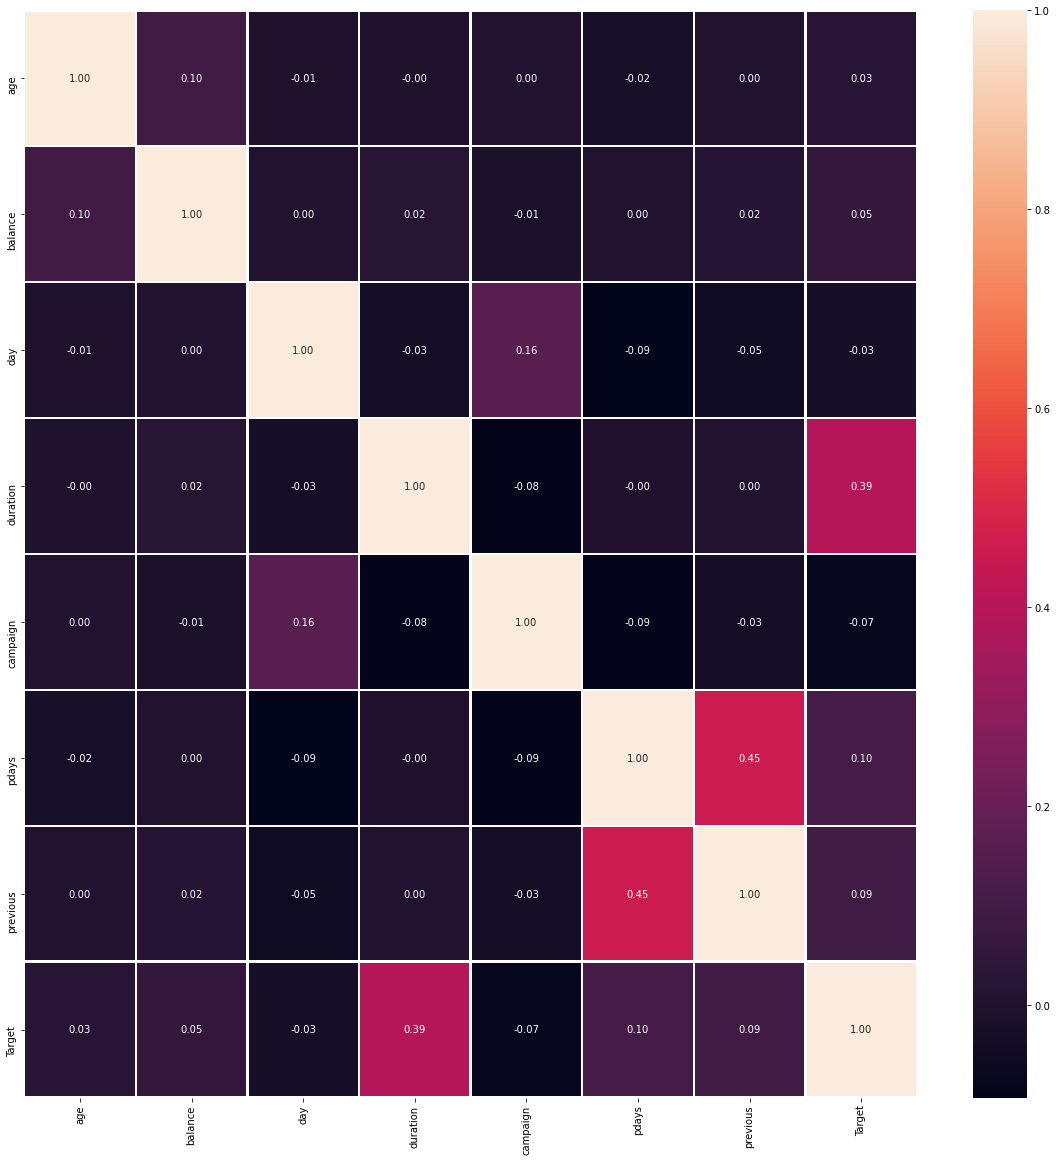

In [17]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90) 
sns.heatmap(pdata.corr(), annot=True, linewidths=1.5, fmt= '.2f')

## Looks like pdays and previous are having a strong relationship with in the data set . We can try to remove one of them and check how our outcome will be¶


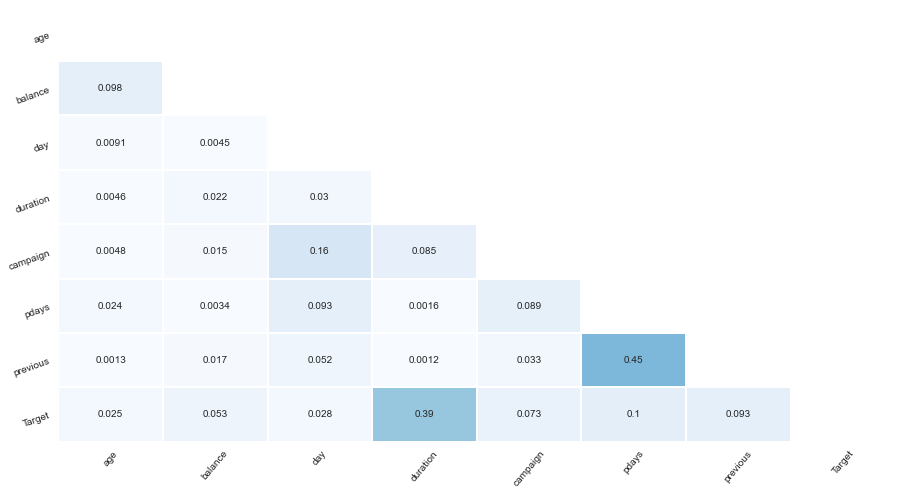

In [19]:
corr = abs(pdata.corr())
lower_triangle = np.tril(corr, k = -1)  
mask = lower_triangle == 0 

plt.figure(figsize = (15,8)) 
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)  
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)
plt.show()

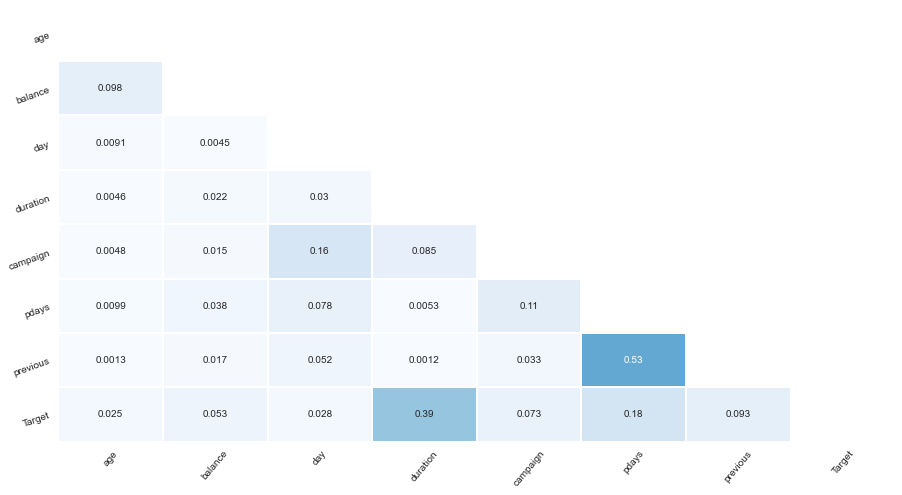

In [21]:
bankDf1=pdata
bankDf1['pdays']=pdata['pdays'].replace([-1],[900]) ## Replacing pdays -1 with 900 as we it is mentioned that it may not be contacted or contacted 900 days ago

corr = abs(bankDf1.corr())
lower_triangle = np.tril(corr, k = -1)  
mask = lower_triangle == 0 

plt.figure(figsize = (15,8)) 
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)  
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)
plt.show()

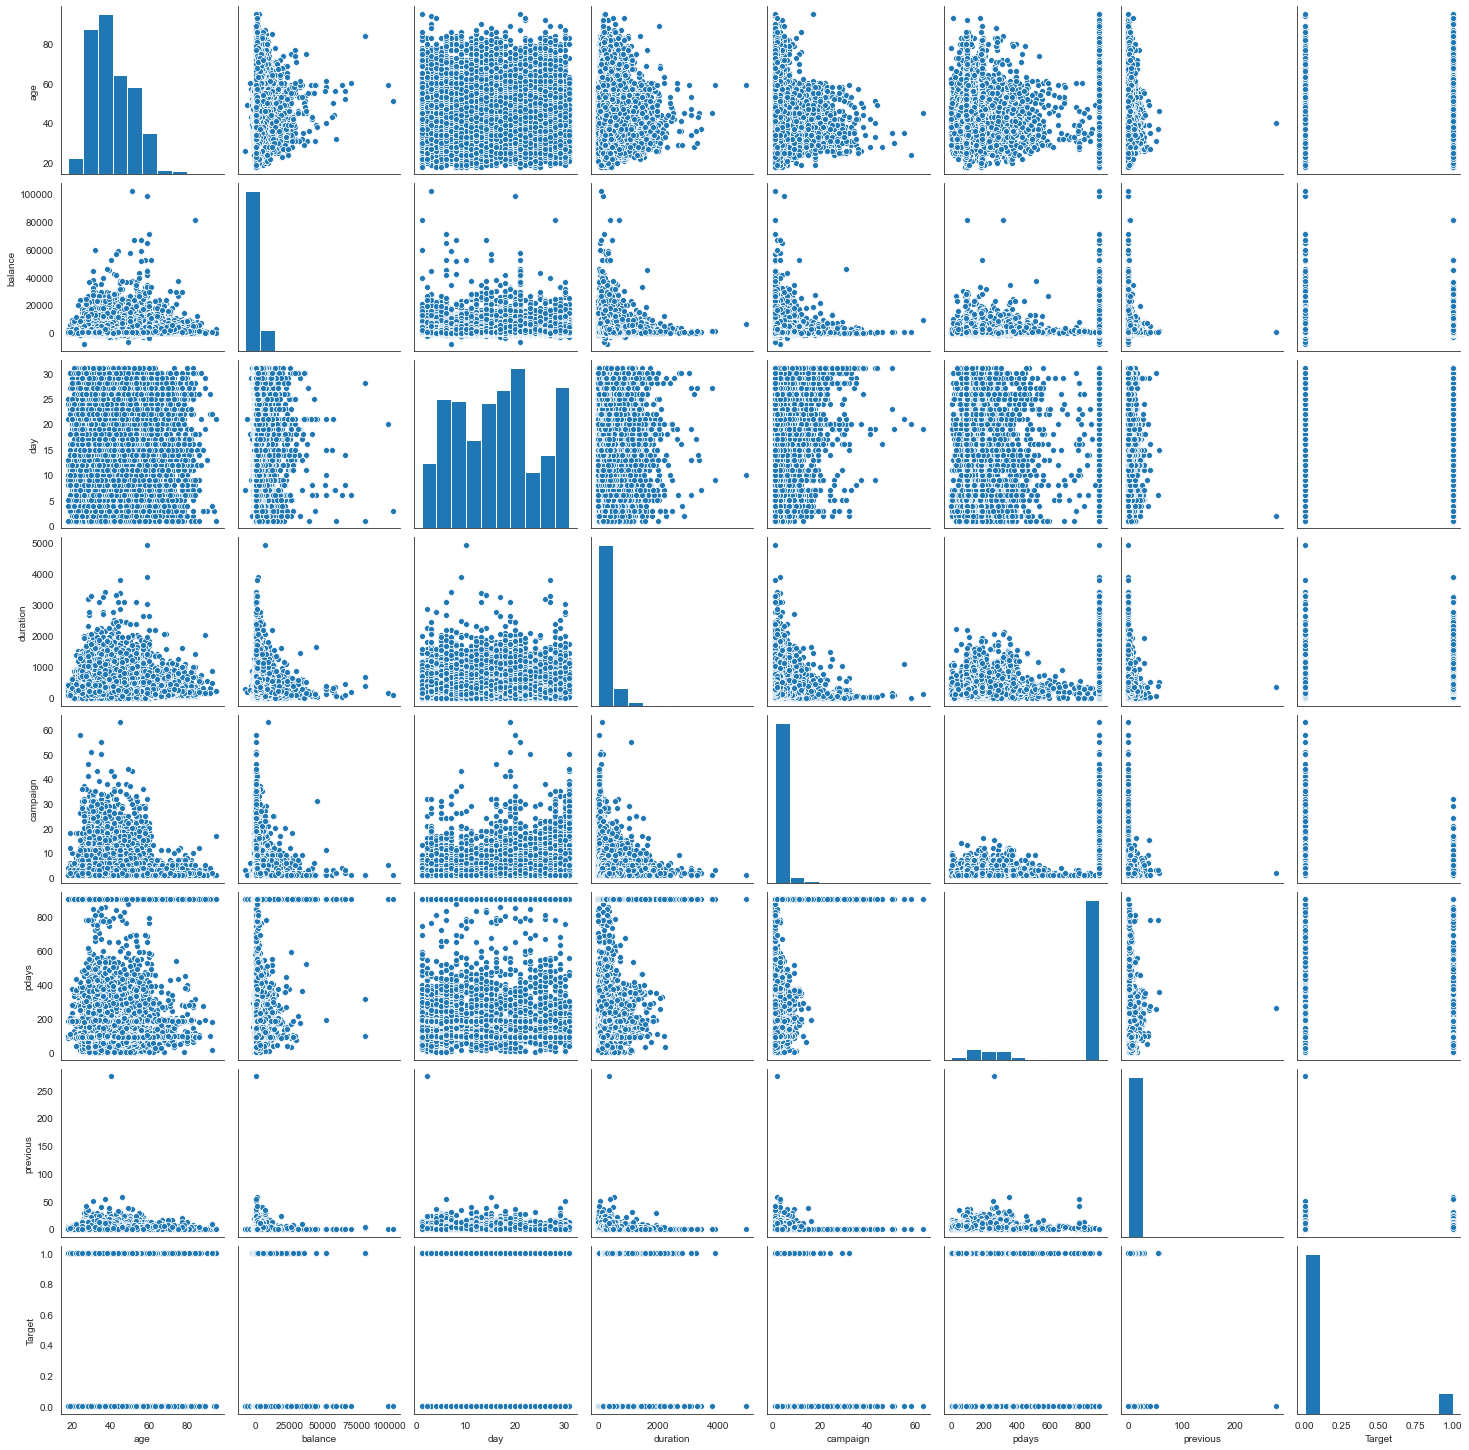

In [22]:
sns.pairplot(bankDf1)

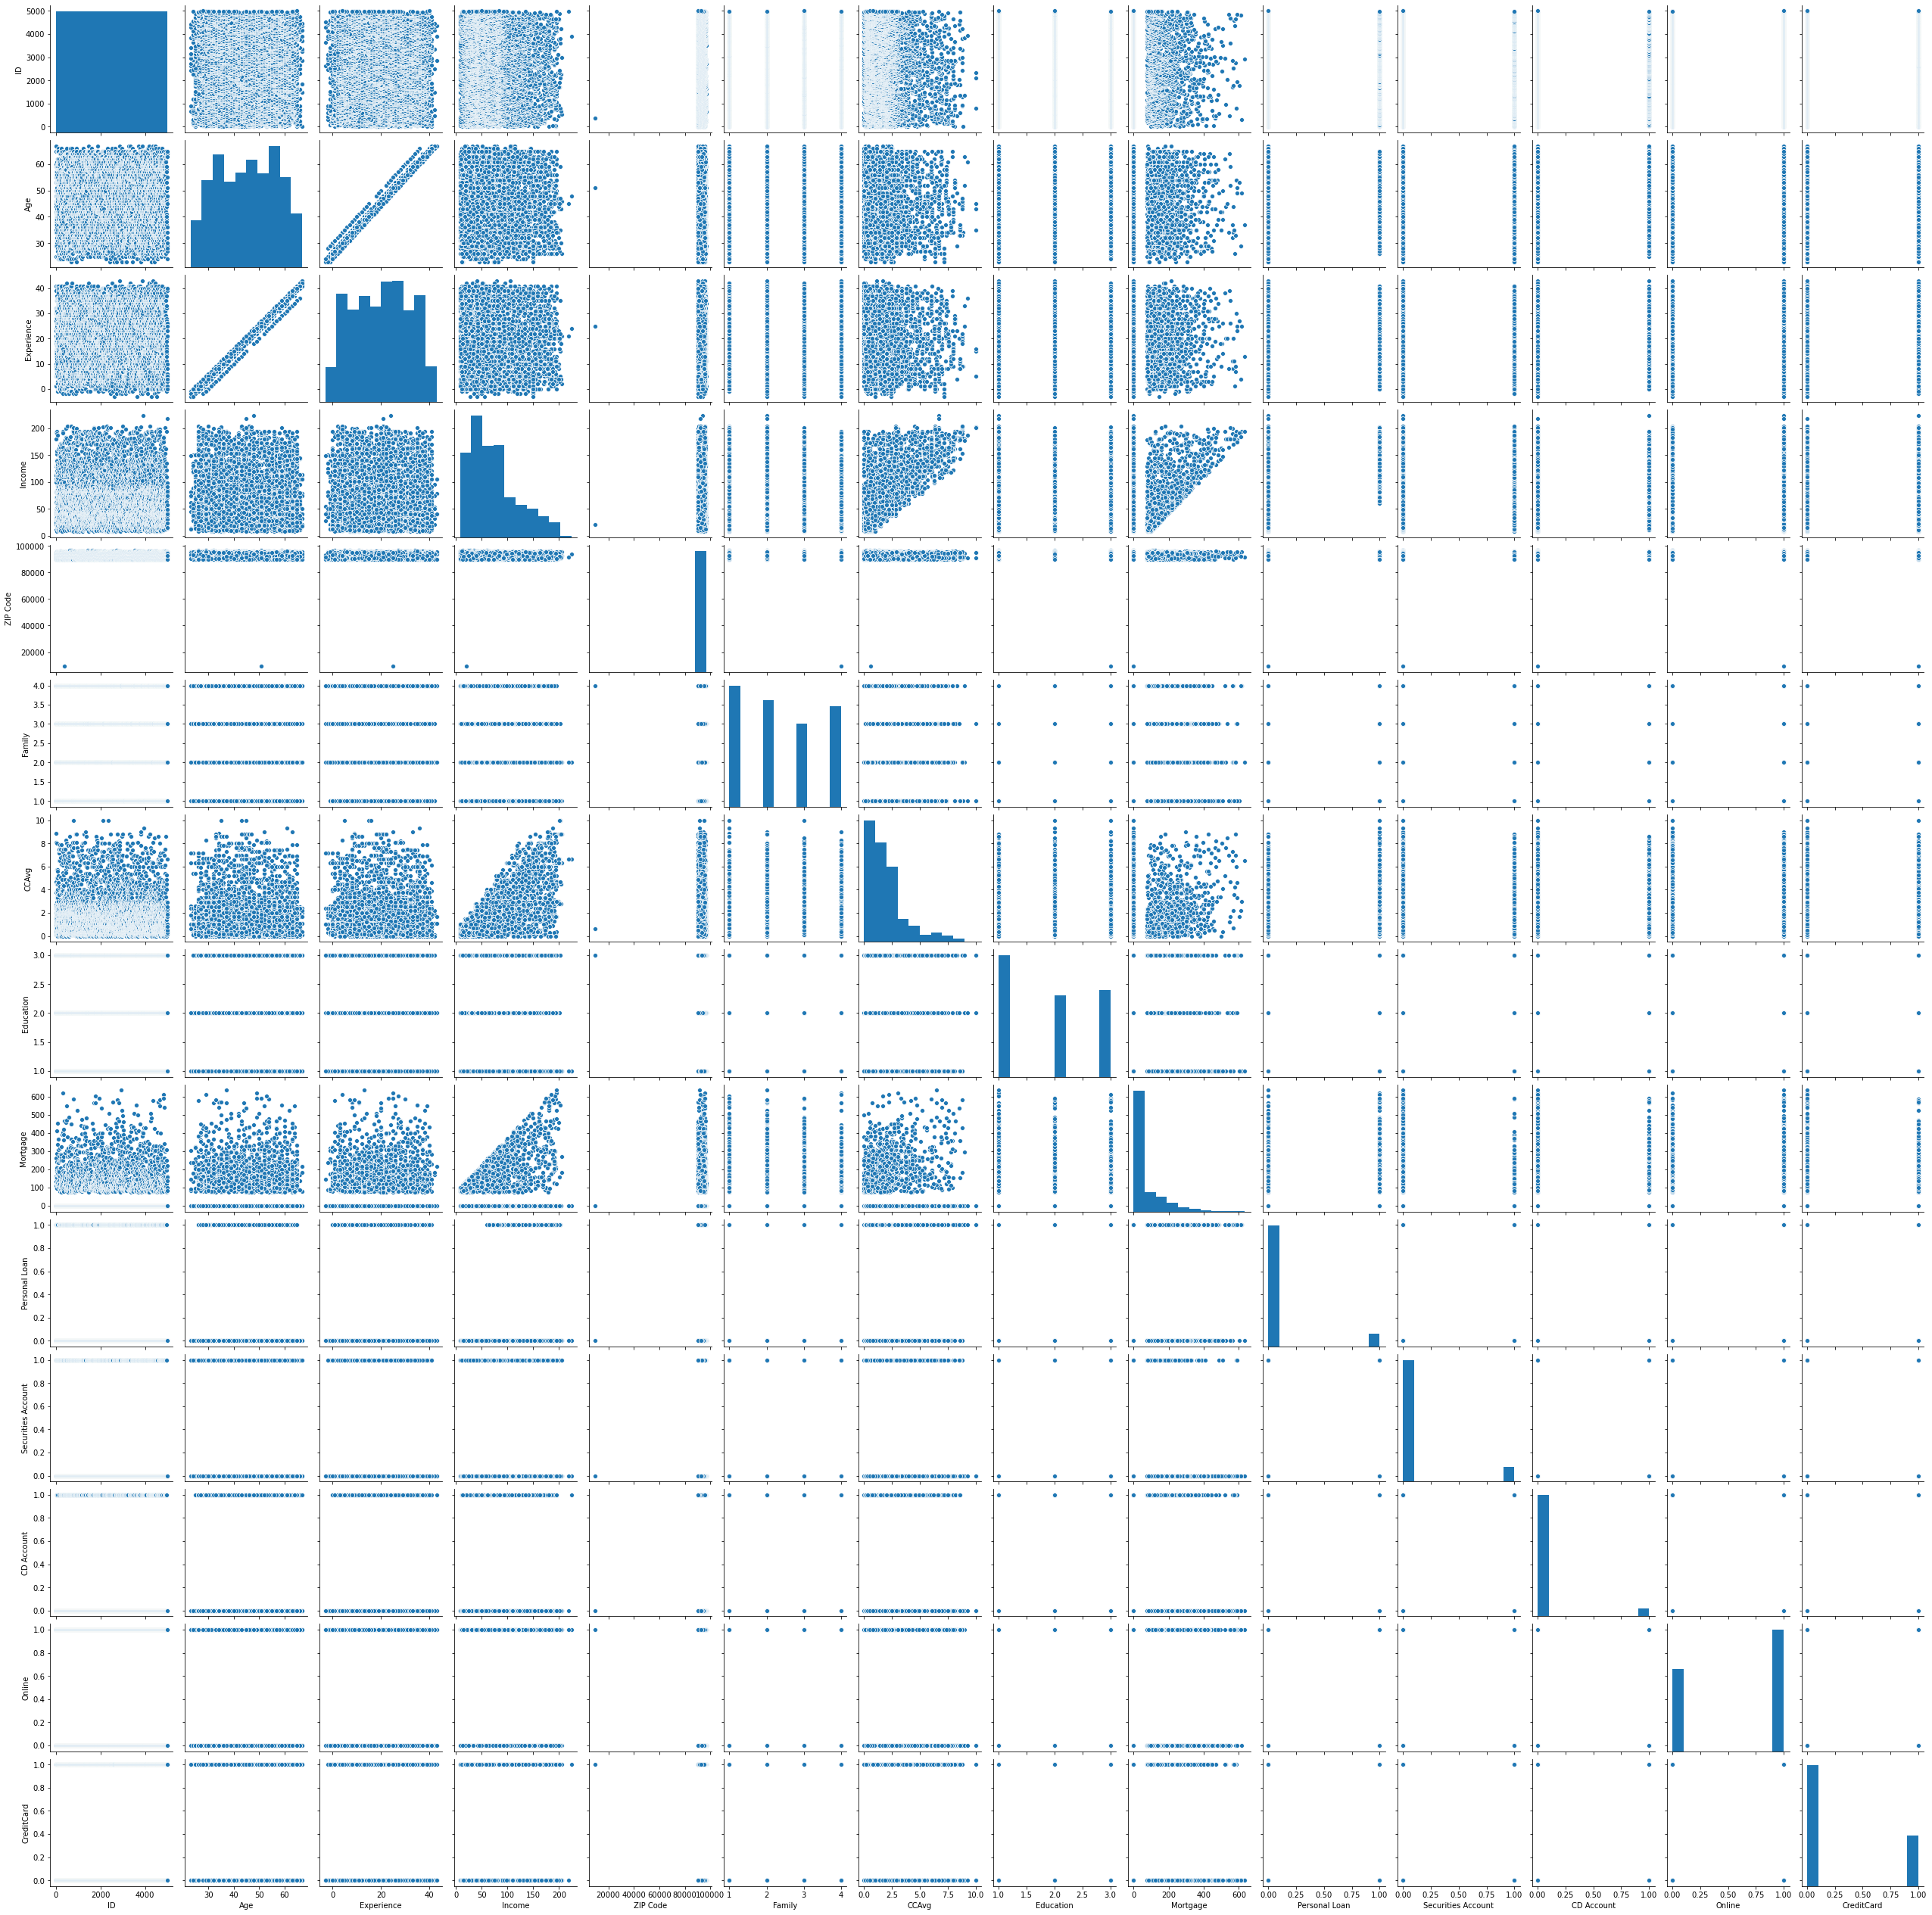

In [17]:
sns.pairplot(pdata) ## We can experiece or age as they are directly related


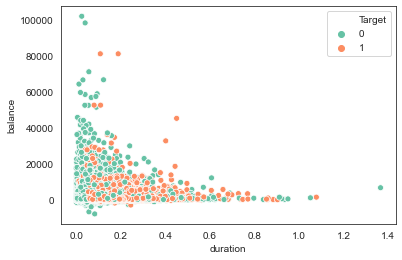

In [23]:

## From above we can drop either previous or pDate after checking initial results

sns.scatterplot(bankDf1['duration']/(3600), bankDf1['balance'],hue= bankDf1['Target'],palette='Set2') 

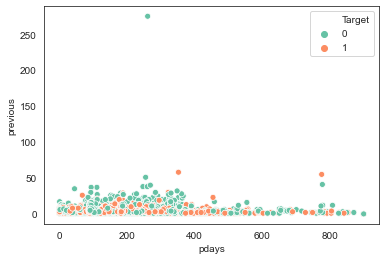

In [24]:
sns.scatterplot(bankDf1['pdays'], bankDf1['previous'],hue= bankDf1['Target'],palette='Set2') 


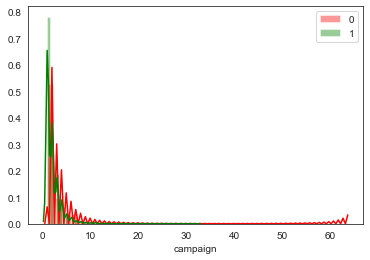

In [25]:

sns.distplot(bankDf1[bankDf1['Target']==0]['campaign'],color='r',label=0)
sns.distplot(bankDf1[bankDf1['Target']==1]['campaign'],color='g',label=1)
plt.legend()
plt.show()

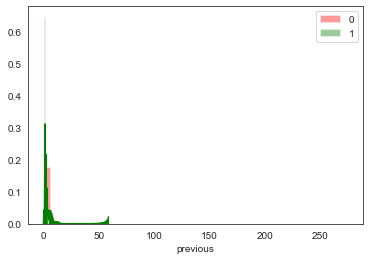

In [26]:
sns.distplot(bankDf1[bankDf1['Target']==0]['previous'],color='r',label=0)
sns.distplot(bankDf1[bankDf1['Target']==1]['previous'],color='g',label=1)
plt.legend()
plt.show()

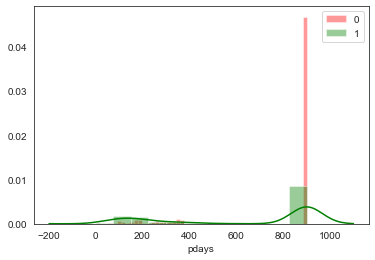

In [27]:
sns.distplot(bankDf1[bankDf1['Target']==0]['pdays'],color='r',label=0)
sns.distplot(bankDf1[bankDf1['Target']==1]['pdays'],color='g',label=1)
plt.legend()
plt.show()


## Based on above graphs we can see how target varible changes with different independent variables. We can see campaign has more retlation to target


## Deliverable 2 - Question 1
## We already changed the objects to Categorical values and Target to 0 and 1

## Deliverable 2 - Question 2 and 3

In [28]:
cols=['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'poutcome']
encodedBankDf=pd.get_dummies(bankDf1, columns=cols)
encodedBankDf.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,900,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,900,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Deliverable 2 - Question 4


In [29]:
encodedBankDf.columns


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [30]:
X = encodedBankDf.drop(['day','age','duration','pdays','balance','job_unknown','marital_divorced','education_unknown','default_yes','housing_no','loan_no','contact_telephone','Target','month_sep','poutcome_unknown'],axis=1)
Y = encodedBankDf['Target'].astype('category')
## Dropping some unnecessary columns and Fetching X from other columns
## making target as Y

In [31]:
X.shape

(45211, 37)

In [32]:
Y.shape

(45211,)

In [34]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [36]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.3, random_state = 1)

In [37]:
xtrain.shape


(31647, 37)

In [38]:
xtest.shape


(13564, 37)

In [39]:
ytrain.shape

(31647,)

In [40]:
ytest.shape

(13564,)

## Deliverable 3

In [41]:
from sklearn.linear_model import LogisticRegression   
lgtModel = LogisticRegression()  
lgtModel.fit(xtrain, ytrain)

LogisticRegression()

In [42]:
predictLGT = lgtModel.predict(xtest)    

print("Trainig score=",lgtModel.score(xtrain,ytrain),"  Testing score=",lgtModel.score(xtest, ytest)) 

Trainig score= 0.8912693146269789   Testing score= 0.8948687702742554


## score looks good as they are close and testing score > training score

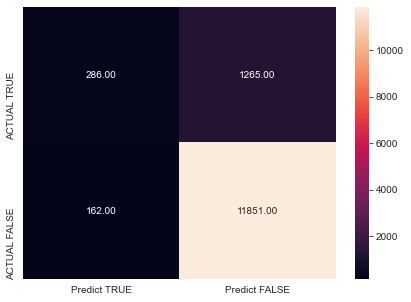

In [43]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(xtrain, ytrain)
#predict on test
ypredict = model.predict(xtest)

cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)


In [44]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))

Accuracy: 0.8947950457092303
F1 score: 0.2861430715357679
F1 score: 0.8680791745041156
F1 score: [0.94321302 0.28614307]
Recall: 0.18439716312056736
Recall: 0.8947950457092303
Precision: 0.6383928571428571
Precision: 0.8732327085646199
roc_auc_score: 0.5854558861469814
roc_auc_score: 0.5854558861469814


Trainig score= 0.8965778746800644   Testing score= 0.8940578000589796


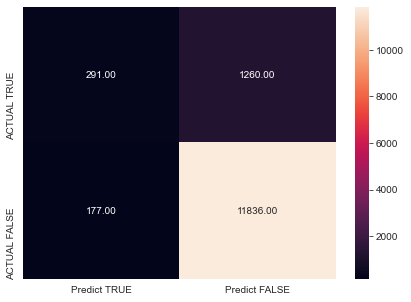

In [45]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier
desTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 7)
desTree.fit(xtrain, ytrain)
ypredict = desTree.predict(xtest)
print("Trainig score=",desTree.score(xtrain,ytrain),"  Testing score=",desTree.score(xtest, ytest))  

cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)

In [46]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))

Accuracy: 0.8940578000589796
F1 score: 0.28826151560178304
F1 score: 0.8679286282055747
F1 score: [0.94276952 0.28826152]
Recall: 0.18762088974854932
Recall: 0.8940578000589796
Precision: 0.6217948717948718
Precision: 0.8715424708508224
roc_auc_score: 0.5864434258115926
roc_auc_score: 0.5864434258115926


## EL - Bagging

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.ensemble import BaggingClassifier

import sklearn.metrics as metrics

baggingCl = BaggingClassifier( DecisionTreeClassifier( max_depth=4,
                                                    random_state=0,
                                                    criterion='entropy'
                                                    ),n_estimators=50,random_state=1)

baggingCl = baggingCl.fit(xtrain, ytrain)

Trainig score= 0.8931020317881632 Testing score= 0.8956797404895311


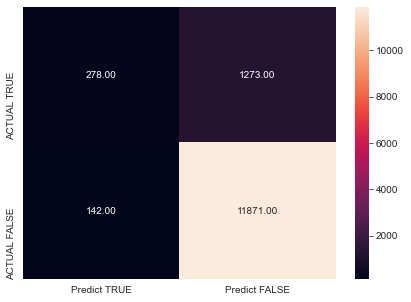

In [49]:
ypredict = baggingCl.predict(xtest)

print("Trainig score=",baggingCl.score(xtrain,ytrain), "Testing score=",baggingCl.score(xtest, ytest)) 

cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)

In [50]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))


Accuracy: 0.8956797404895311
F1 score: 0.2820903094875698
F1 score: 0.8680941918762936
F1 score: [0.94375323 0.28209031]
Recall: 0.17923920051579625
Recall: 0.8956797404895311
Precision: 0.6619047619047619
Precision: 0.8755641363523298
roc_auc_score: 0.5837093363771024
roc_auc_score: 0.5837093363771024


## EL Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=50,random_state=1)
boost = boost.fit(xtrain, ytrain)
print("Trainig score=",boost.score(xtrain,ytrain), "Testing score=",boost.score(xtest, ytest))

Trainig score= 0.8913009131987234 Testing score= 0.8945001474491301


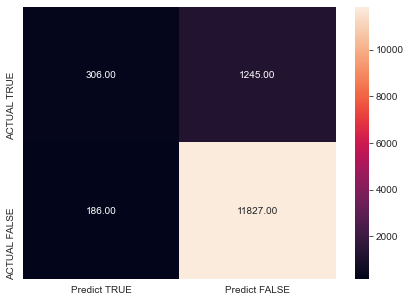

In [53]:
ypredict = boost.predict(xtest)


cm=metrics.confusion_matrix(ytest, ypredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["ACTUAL TRUE","ACTUAL FALSE"]],
                  columns = [i for i in ["Predict TRUE","Predict FALSE"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,fmt='.2f', annot=True)

In [54]:
print ('Accuracy:', accuracy_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict))
print ('F1 score:', f1_score(ytest, ypredict,average='weighted'))
print ('F1 score:', f1_score(ytest, ypredict,average=None))
print ('Recall:', recall_score(ytest, ypredict))
print ('Recall:', recall_score(ytest, ypredict,average='weighted'))
print ('Precision:', precision_score(ytest, ypredict))
print ('Precision:', precision_score(ytest, ypredict,average='weighted'))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict))
print ('roc_auc_score:', roc_auc_score(ytest, ypredict,average='weighted'))


Accuracy: 0.8945001474491301
F1 score: 0.29955947136563876
F1 score: 0.8693838558018343
F1 score: [0.94295396 0.29955947]
Recall: 0.19729206963249515
Recall: 0.8945001474491301
Precision: 0.6219512195121951
Precision: 0.8724201815154385
roc_auc_score: 0.5909044215639375
roc_auc_score: 0.5909044215639375


## Over all all the models looks good as training and testing accuracy is close. We can prefer bagging or Logistic regression for simplicity